In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get the current working directory for robust file paths
script_dir = os.getcwd()
data_dir = os.path.join(script_dir, '../data/raw/')

# Load dataframes
datafiniti_amazon_1 = pd.read_csv(os.path.join(data_dir,
                                                "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"))
datafiniti_amazon_may19 = pd.read_csv(os.path.join(data_dir,
                                                    "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"))
data_1429_1 = pd.read_csv(os.path.join(data_dir, "1429_1.csv"))

C:\Users\nicol\AppData\Local\Temp\ipykernel_23504\874982437.py:8: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1429_1 = pd.read_csv(os.path.join(data_dir, "1429_1.csv"))


In [3]:
common_cols = datafiniti_amazon_1.columns.difference(datafiniti_amazon_may19.columns)
print("Common columns:", common_cols)
common_cols = datafiniti_amazon_1.columns.difference(data_1429_1.columns)
print("Common columns:", common_cols)

Common columns: Index(['reviews.dateAdded'], dtype='object')
Common columns: Index(['dateAdded', 'dateUpdated', 'imageURLs', 'manufacturerNumber',
       'primaryCategories', 'sourceURLs'],
      dtype='object')


In [4]:
datafiniti_amazon_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [5]:
datafiniti_amazon_may19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [6]:
data_1429_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [7]:
def plot_rating_distributions(datasets):
    """Generates and histograms for rating distributions."""
    for name, df in datasets.items():
        if "reviews.rating" in df.columns:
            plt.figure(figsize=(10, 6))
            df_clean = df.dropna(subset=["reviews.rating"])
            plt.hist(
                df_clean["reviews.rating"],
                bins=range(1, 7),
                align="left",
                rwidth=0.8,
                color="skyblue",
                edgecolor="black",
            )
            plt.title(f"Distribution of Ratings in {name} Dataset")
            plt.xlabel("Rating")
            plt.ylabel("Frequency")
            plt.xticks(range(1, 6))
            plt.grid(axis="y", alpha=0.75)
            plt.show()

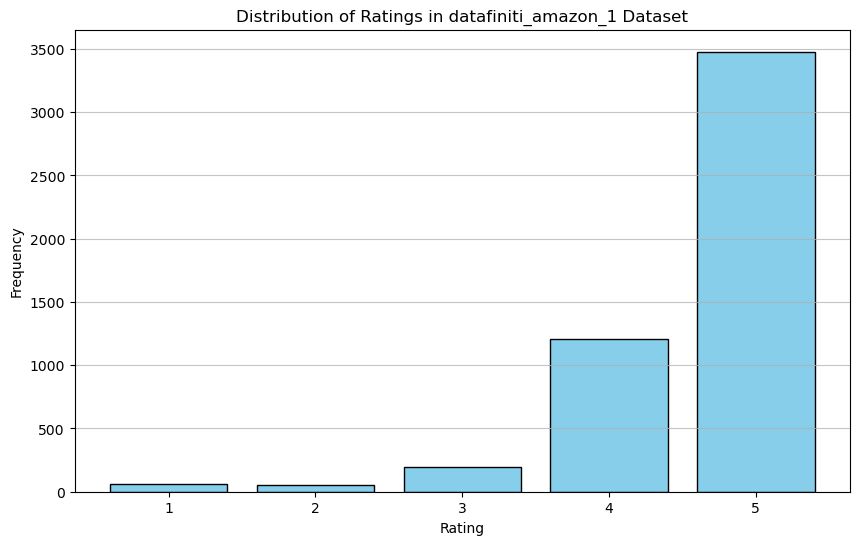

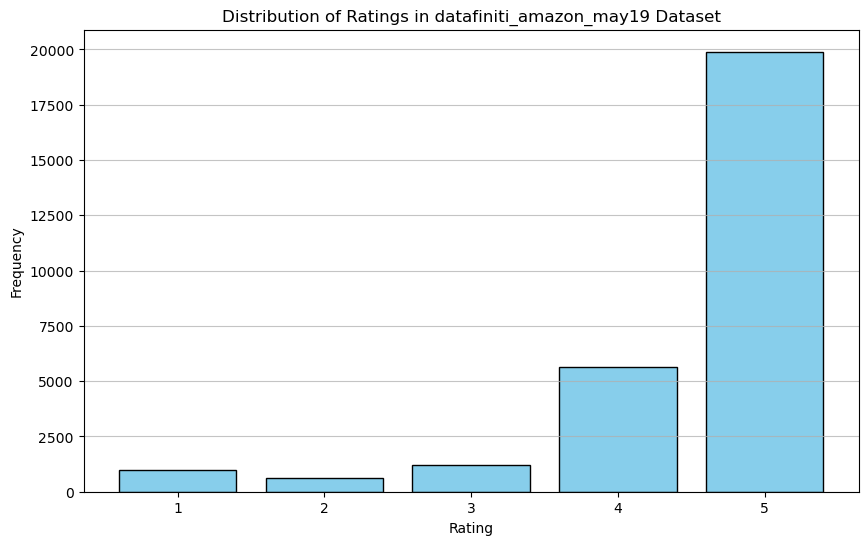

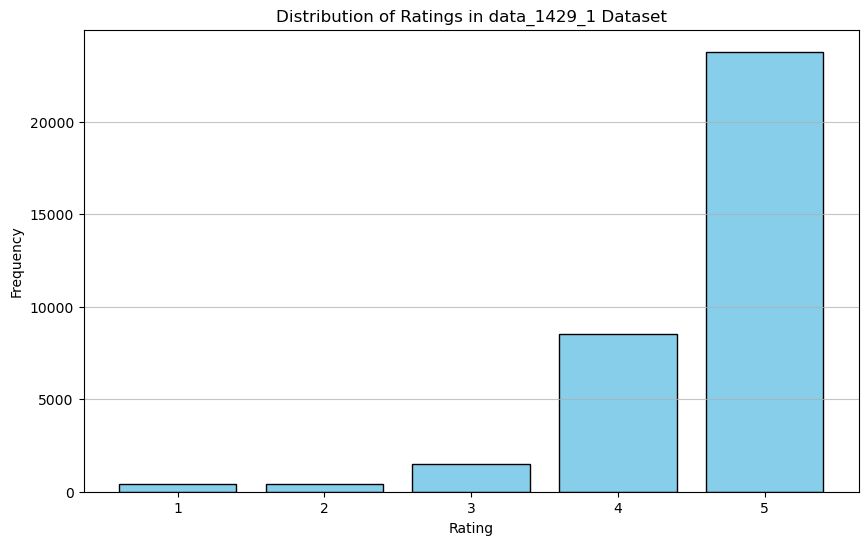

In [8]:
datasets = {
    "datafiniti_amazon_1": datafiniti_amazon_1,
    "datafiniti_amazon_may19": datafiniti_amazon_may19,
    "data_1429_1": data_1429_1,
}
plot_rating_distributions(datasets)

In [9]:
# First concatenation step
df1_pre = datafiniti_amazon_1.copy()
df2_pre = datafiniti_amazon_may19.copy()

drop_cols = ["reviews.dateAdded"]
df1_pre = df1_pre.drop(
    columns=[c for c in drop_cols if c in df1_pre.columns], errors="ignore"
)
df2_pre = df2_pre.drop(
    columns=[c for c in drop_cols if c in df2_pre.columns], errors="ignore"
)

df1_pre = df1_pre.loc[:, ~df1_pre.columns.duplicated()]
df2_pre = df2_pre.loc[:, ~df2_pre.columns.duplicated()]

datafiniti_amazon_pre = pd.concat([df1_pre, df2_pre], ignore_index=True)
datafiniti_amazon_pre = datafiniti_amazon_pre.drop_duplicates()

# Second concatenation step
df1 = datafiniti_amazon_pre.copy()
df2 = data_1429_1.copy()

df1 = df1.rename(columns={"primaryCategories": "categories"})

drop_cols = [
    "reviews.didPurchase",
    "reviews.id",
    "reviews.userCity",
    "reviews.userProvince",
    "imageURLs",
    "dateAdded",
    "dateUpdated",
    "manufacturerNumber",
    "sourceURLs",
]
df1 = df1.drop(columns=[c for c in drop_cols if c in df1.columns], errors="ignore")
df2 = df2.drop(columns=[c for c in drop_cols if c in df2.columns], errors="ignore")

df1 = df1.loc[:, ~df1.columns.duplicated()]
df2 = df2.loc[:, ~df2.columns.duplicated()]

# Align types
if "reviews.doRecommend" in df1.columns:
    df1["reviews.doRecommend"] = (
        df1["reviews.doRecommend"]
        .map(
            {
                "TRUE": True,
                "FALSE": False,
                "true": True,
                "false": False,
                "True": True,
                "False": False,
                None: None,
            }
        )
        .astype("boolean")
    )

if "reviews.doRecommend" in df2.columns:
    df2["reviews.doRecommend"] = df2["reviews.doRecommend"].astype(
        "boolean", errors="ignore"
    )

if "reviews.numHelpful" in df1.columns:
    df1["reviews.numHelpful"] = (
        pd.to_numeric(df1["reviews.numHelpful"], errors="coerce").fillna(0).astype(int)
    )

# Align common columns by data type
common_cols = list(df1.columns.intersection(df2.columns))
for col in common_cols:
    if df1[col].dtype != df2[col].dtype:
        df1[col] = pd.to_numeric(df1[col], errors="coerce")
        df2[col] = pd.to_numeric(df2[col], errors="coerce")
        df1[col] = df1[col].fillna(pd.NA)
        df2[col] = df2[col].fillna(pd.NA)

# Concatenate the two DataFrames
datafiniti_amazon = pd.concat([df1, df2], ignore_index=True)
datafiniti_amazon = datafiniti_amazon.drop_duplicates()

In [10]:
# Check for the total number of missing values per column
missing_values = datafiniti_amazon.isnull().sum()

# Print the columns with missing values and their counts
print("Missing values per column:")
print(missing_values[missing_values > 0])

# To see the percentage of missing values per column, which is often more informative
total_rows = len(datafiniti_amazon)
missing_percentage = (missing_values / total_rows) * 100
print("\nMissing values percentage per column:")
print(missing_percentage[missing_percentage > 0])

Missing values per column:
name                    6760
asins                      2
reviews.date              39
reviews.doRecommend    33285
reviews.numHelpful       529
reviews.rating            33
reviews.text               1
reviews.title             19
reviews.username          12
reviews.dateAdded      43312
dtype: int64

Missing values percentage per column:
name                   10.036970
asins                   0.002970
reviews.date            0.057906
reviews.doRecommend    49.420202
reviews.numHelpful      0.785437
reviews.rating          0.048997
reviews.text            0.001485
reviews.title           0.028210
reviews.username        0.017817
reviews.dateAdded      64.307880
dtype: float64


In [11]:
datafiniti_amazon.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateSeen,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,reviews.dateAdded
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-03T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",<NA>,0.0,3.0,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,NaN
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-06-06T00:00:00.000Z,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",<NA>,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,NaN
2,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2018-04-20T00:00:00.000Z,2018-05-27T00:00:00Z,<NA>,0.0,4.0,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,NaN
3,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-11-02T17:33:31.000Z,2018-10-09T00:00:00Z,<NA>,3.0,5.0,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,NaN
4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2018-04-24T00:00:00.000Z,2018-05-27T00:00:00Z,<NA>,0.0,5.0,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,NaN


In [12]:
# Handle missing values
if "name" in datafiniti_amazon.columns:
    datafiniti_amazon["name"] = datafiniti_amazon["name"].fillna("Anon")

if "reviews.doRecommend" in datafiniti_amazon.columns:
    datafiniti_amazon["reviews.doRecommend"] = datafiniti_amazon[
        "reviews.doRecommend"
    ].fillna(False)

if "reviews.dateAdded" in datafiniti_amazon.columns:
    datafiniti_amazon = datafiniti_amazon.drop(columns=["reviews.dateAdded"])

if "asins" in datafiniti_amazon.columns:
    datafiniti_amazon["asins"] = datafiniti_amazon["asins"].fillna("Unknown")

if "reviews.date" in datafiniti_amazon.columns:
    datafiniti_amazon["reviews.date"] = pd.to_datetime(
        datafiniti_amazon["reviews.date"], errors="coerce"
    )
    median_date = datafiniti_amazon["reviews.date"].median()
    datafiniti_amazon["reviews.date"] = datafiniti_amazon["reviews.date"].fillna(
        median_date
    )

if "reviews.numHelpful" in datafiniti_amazon.columns:
    datafiniti_amazon["reviews.numHelpful"] = datafiniti_amazon[
        "reviews.numHelpful"
    ].fillna(0)

# Drop rows where 'reviews.rating' or 'reviews.text' is NaN
datafiniti_amazon = datafiniti_amazon.dropna(
    subset=["reviews.rating", "reviews.text"]
)

if "reviews.title" in datafiniti_amazon.columns:
    datafiniti_amazon = datafiniti_amazon.rename(columns={"reviews.title": "title"})
    datafiniti_amazon["title"] = datafiniti_amazon["title"].fillna("title")

if "reviews.username" in datafiniti_amazon.columns:
    datafiniti_amazon["reviews.username"] = datafiniti_amazon[
        "reviews.username"
    ].fillna("Anon")


In [13]:
# Rename columns
new_columns = {col: col.replace("reviews.", "") for col in datafiniti_amazon.columns}
datafiniti_amazon = datafiniti_amazon.rename(columns=new_columns)

In [14]:
# Add star_sentiment column
if "rating" in datafiniti_amazon.columns:

    def map_rating_to_sentiment(rating):
        if rating >= 4:
            return "Positive"
        elif rating == 3:
            return "Neutral"
        else:
            return "Negative"

    datafiniti_amazon["star_sentiment"] = datafiniti_amazon["rating"].apply(
        map_rating_to_sentiment
    )

In [15]:
if "doRecommend" in datafiniti_amazon.columns and "star_sentiment" in datafiniti_amazon.columns:
    def determine_trustworthy(row):
        sentiment = row["star_sentiment"]
        recommend = row["doRecommend"]

        if sentiment == "Positive":
            return recommend  # True if recommend is True, False if recommend is False
        elif sentiment == "Neutral":
            return True
        elif sentiment == "Negative":
            return not recommend # True if recommend is False, False if recommend is True
        return None # In case sentiment is neither Positive, Neutral nor Negative

    datafiniti_amazon["trustworthy"] = datafiniti_amazon.apply(
        determine_trustworthy, axis=1
    )

In [16]:
datafiniti_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67317 entries, 0 to 67896
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              67317 non-null  object             
 1   name            67317 non-null  object             
 2   asins           67317 non-null  object             
 3   brand           67317 non-null  object             
 4   categories      67317 non-null  object             
 5   keys            67317 non-null  object             
 6   manufacturer    67317 non-null  object             
 7   date            67317 non-null  datetime64[ns, UTC]
 8   dateSeen        67317 non-null  object             
 9   doRecommend     67317 non-null  boolean            
 10  numHelpful      67317 non-null  float64            
 11  rating          67317 non-null  float64            
 12  sourceURLs      67317 non-null  object             
 13  text            67317 non-null  obje

) missing from font(s) Arial.Temp\ipykernel_23504\671799882.py:60: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) Arial.\project_nlp_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


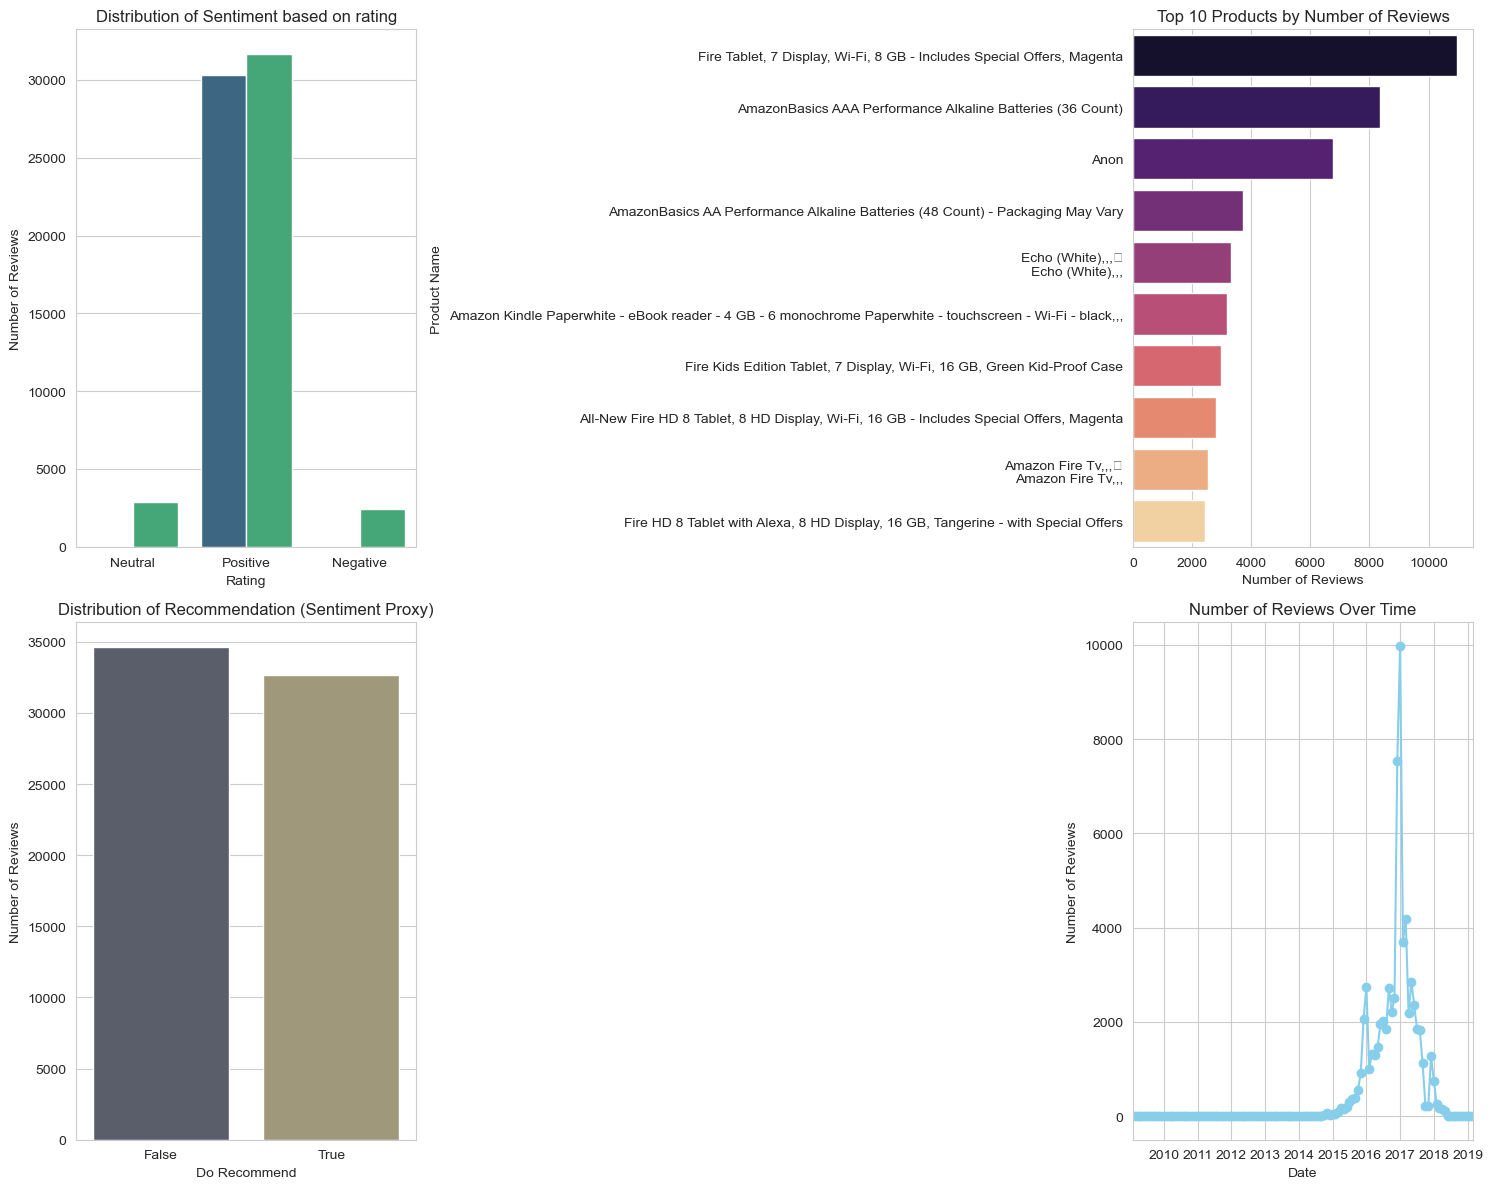

In [17]:
# Data Visualization
sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

# 1. Distribution of Sentiment
if "star_sentiment" in datafiniti_amazon.columns:
    plt.subplot(2, 2, 1)
    sns.countplot(
        x="star_sentiment",
        data=datafiniti_amazon,
        palette="viridis",
        hue="trustworthy",
        legend=False,
    )
    plt.title("Distribution of Sentiment based on rating")
    plt.xlabel("Rating")
    plt.ylabel("Number of Reviews")

# 2. Top 10 Products by Number of Reviews
if "name" in datafiniti_amazon.columns:
    plt.subplot(2, 2, 2)
    top_products = datafiniti_amazon["name"].value_counts().nlargest(10)
    sns.barplot(
        x=top_products.values,
        y=top_products.index,
        palette="magma",
        hue=top_products.index,
        legend=False,
    )
    plt.title("Top 10 Products by Number of Reviews")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Product Name")

# 3. Distribution of 'Do Recommend'
if "doRecommend" in datafiniti_amazon.columns:
    plt.subplot(2, 2, 3)
    sns.countplot(
        x="doRecommend",
        data=datafiniti_amazon,
        palette="cividis",
        hue="doRecommend",
        legend=False,
    )
    plt.title("Distribution of Recommendation (Sentiment Proxy)")
    plt.xlabel("Do Recommend")
    plt.ylabel("Number of Reviews")

# 4. Reviews Over Time (Monthly Trend)
if "date" in datafiniti_amazon.columns:
    plt.subplot(2, 2, 4)
    datafiniti_amazon["date"] = pd.to_datetime(
        datafiniti_amazon["date"], errors="coerce"
    )
    reviews_over_time = datafiniti_amazon.set_index("date").resample("ME").size()
    reviews_over_time.plot(kind="line", marker="o", linestyle="-", color="skyblue")
    plt.title("Number of Reviews Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Reviews")

plt.tight_layout()
plt.show()

In [18]:
# Save the cleaned dataframe
file_name = "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_cleaned.csv"
output_path = os.path.join(script_dir, "../data/processed/", file_name)
datafiniti_amazon.to_csv(output_path, index=False)

In [20]:
datafiniti_amazon.head()

,id,name,asins,brand,categories,keys,manufacturer,date,dateSeen,doRecommend,numHelpful,rating,sourceURLs,text,title,username,star_sentiment,trustworthy
0,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-09-03 00:00:00+00:00,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,0.0,3.0,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,Neutral,True
1,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-06-06 00:00:00+00:00,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",False,0.0,5.0,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,Positive,False
2,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2018-04-20 00:00:00+00:00,2018-05-27T00:00:00Z,False,0.0,4.0,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,Positive,False
3,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2017-11-02 17:33:31+00:00,2018-10-09T00:00:00Z,False,3.0,5.0,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,Positive,False
4,AVqVGZNvQMlgsOJE6eUY,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",allnewkindleereaderblack6glarefreetouchscreend...,Amazon,2018-04-24 00:00:00+00:00,2018-05-27T00:00:00Z,False,0.0,5.0,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,Positive,False
